In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This notebook will be dedicated to review behavior of the liquidity of Perpetual V2. Considering that this notebook will try to collect all possible information about that aspect of the platform here will be used all tables related to creating a complete overview of the liquidity situation

# Liquidity changes

Here will be presented copy of the description taken from Subgraph:

*   ```id``` = transaction hash with appended to the end with transaction log index;
*   ```txHash``` = hash code of the transaction;
*   ```maker``` = hash code of the trader/maker;
*   ```base_token``` = hash code of the token, in pool of which liquidity change was registered;
*   ```quote_token``` = hash code of the second token in pool (all cases contain USD coin);
*   ```lower_tick``` = lower degree used in formula to find lower threshold of the participating price range;
*   ```upper_tick``` = upper degree used in formula to find upper threshold of the participating price range;
*   ```base``` = amount of base token added to the liquidity, exclude fee ("+" - means added liquidity; "-" - means removed liquidity);
*   ```quote``` = amount of quote token added to the liquidity, exclude fee ("+" - means added liquidity; "-" - means removed liquidity);
*   ```liquidity``` = amount of liquidity unit added ("+" - means added liquidity; "-" - means removed liquidity);
*   ```quoteFee``` = amount of quote token the maker received as fee;
*   ```from_function_signature``` = signature of the applied function;
*   ```block_number_log_index``` = block number * 1000 + tx log index. Used for sorting transactions in the system;
*   ```block_number``` = number of the block where transaction was executed;
*   ```timestamp``` = time in seconds

Considering that ```quote_token``` is the same for all situations it is possible to ignore that columns at the current stage (**IMPORTANT**: *only now it is not important, there is an update coming, where platform will add support of other quote tokens and therefore it will be required to check for their prices and so on*)

In [46]:
liquidity_changes_df = pd.read_csv("liquidity_changes.csv")
liquidity_changes_df.drop(columns=["Unnamed: 0", "quote_token"], inplace=True)
liquidity_changes_df["time"] = pd.to_datetime(liquidity_changes_df["timestamp"], unit='s')
liquidity_changes_df["day_of_year"] = liquidity_changes_df["time"].dt.dayofyear
liquidity_changes_df

,id,tx_hash,maker,base_token,lower_tick,upper_tick,base,quote,liquidity,quote_fee,from_function_signature,block_number_log_index,block_number,timestamp,time,day_of_year
0,0x7871b4fe6113ac31c8be911146b109575cfb9ee90b13...,0x7871b4fe6113ac31c8be911146b109575cfb9ee90b13...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,82680,83700,46.254982,200000.000000,120851329740116430743586,0.000000,0xc35eb28c,515557003,515557,1638000985,2021-11-27 08:16:25,331
1,0x7dba9c535f6c595ab39eeec818d89b34783442bafa81...,0x7dba9c535f6c595ab39eeec818d89b34783442bafa81...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,-887220,887220,0.012181,50.000000,780406707692264026,0.000000,0xc35eb28c,515554004,515554,1638000985,2021-11-27 08:16:25,331
2,0xc438a7cd8fee202ce2b53761811ef05f85095933b27e...,0xc438a7cd8fee202ce2b53761811ef05f85095933b27e...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,108540,109500,3.572179,200000.000000,35648835496586206981164,0.000000,0xc35eb28c,515555003,515555,1638000985,2021-11-27 08:16:25,331
3,0xec1e410b931f920c4aa3ae105e63463142b310fbe959...,0xec1e410b931f920c4aa3ae105e63463142b310fbe959...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,-887220,887220,0.000921,50.000000,214579018294735723,0.000000,0xc35eb28c,515552004,515552,1638000985,2021-11-27 08:16:25,331
4,0x653f9413a9c8df27d2800bbb71f06fd20b6d825b3d38...,0x653f9413a9c8df27d2800bbb71f06fd20b6d825b3d38...,0x35952141922ee99a04e016c967c3f0ad589ea958,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,82920,83640,0.100000,472.798469,386315245282791945890,0.000000,0xc35eb28c,516478004,516478,1638003992,2021-11-27 09:06:32,331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95645,0x3c94355621ea01688d374d07da032f57f3ec04480187...,0x3c94355621ea01688d374d07da032f57f3ec04480187...,0x94934851b2c6a066f9e5acb353bce4bc7fcdcdbd,0x151bb01c79f4516c233948d69dae39869bccb737,45120,47040,-2470.572327,-248190.110460,-528387530374088819323470,0.000000,0xcde109b6,6654324008,6654324,1651142059,2022-04-28 10:34:19,118
95646,0x19a82695df86a912368aac959536f93262c39cfe02f6...,0x19a82695df86a912368aac959536f93262c39cfe02f6...,0xe77dd81813bd06d74a30d1b2c07418906456498e,0x333b1ea429a88d0dd48ce7c06c16609cd76f43a8,8460,10380,-204626.160511,-454278.053108,-6522007735030680945024298,58.114949,0xcde109b6,6654380006,6654380,1651142170,2022-04-28 10:36:10,118
95647,0xda223d45899d4d3e9e39a193dbbda700edde88110101...,0xda223d45899d4d3e9e39a193dbbda700edde88110101...,0xe77dd81813bd06d74a30d1b2c07418906456498e,0x333b1ea429a88d0dd48ce7c06c16609cd76f43a8,8400,10320,49063.646978,123088.079928,1658298770984291147556810,0.000000,0xc35eb28c,6654370006,6654370,1651142170,2022-04-28 10:36:10,118
95648,0x716065511888b305590bf64cb26fba2f2270d26453c8...,0x716065511888b305590bf64cb26fba2f2270d26453c8...,0x70332de459d5554a9a310a7c4f7c6069c73604f9,0x2db8d2db86ca3a4c7040e778244451776570359b,-960,960,487306.142879,500000.000000,10533713373586645166672268,0.000000,0xc35eb28c,6654565006,6654565,1651142607,2022-04-28 10:43:27,118


Make sure that there are 18 tokens at the moment. If more - check for new tokens not listed below in dictionary

In [47]:
len(liquidity_changes_df["base_token"].unique())

18

In [48]:
tokens_addresses_to_names_dict = {
    "0x86f1e0420c26a858fc203a3645dd1a36868f18e5": "vBTC",
    "0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb": "vETH",
    "0x5faa136fc58b6136ffdaeaac320076c4865c070f": "vAVAX",
    "0xb24f50dd9918934ab2228be7a097411ca28f6c14": "vLUNA",
    "0x151bb01c79f4516c233948d69dae39869bccb737": "vSOL",
    "0x7161c3416e08abaa5cd38e68d9a28e43a694e037": "vCRV",
    "0x333b1ea429a88d0dd48ce7c06c16609cd76f43a8": "vSAND",
    "0x2f198182ec54469195a4a06262a9431a42462373": "vLINK",
    "0x5f714b5347f0b5de9f9598e39840e176ce889b9c": "vATOM",
    "0x77d0cc9568605bfff32f918c8ffaa53f72901416": "vONE",
    "0x3fb3282e3ba34a0bff94845f1800eb93cc6850d4": "vNEAR",
    "0x2db8d2db86ca3a4c7040e778244451776570359b": "vFTM",
    "0x7eada83e15acd08d22ad85a1dce92e5a257acb92": "vFLOW",
    "0xb6599bd362120dc70d48409b8a08888807050700": "vBNB",
    "0x9482aafdced6b899626f465e1fa0cf1b1418d797": "vPERP",
    "0xbe5de48197fc974600929196239e264ecb703ee8": "vMATIC",
    "0x34235c8489b06482a99bb7fcab6d7c467b92d248": "vAAVE",
    "0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2": "vAPE"
}

liquidity_changes_df["pool_name"] = liquidity_changes_df["base_token"].replace(tokens_addresses_to_names_dict)
liquidity_changes_df.drop(columns=["base_token"], inplace=True)
liquidity_changes_df

,id,tx_hash,maker,lower_tick,upper_tick,base,quote,liquidity,quote_fee,from_function_signature,block_number_log_index,block_number,timestamp,time,day_of_year,pool_name
0,0x7871b4fe6113ac31c8be911146b109575cfb9ee90b13...,0x7871b4fe6113ac31c8be911146b109575cfb9ee90b13...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,82680,83700,46.254982,200000.000000,120851329740116430743586,0.000000,0xc35eb28c,515557003,515557,1638000985,2021-11-27 08:16:25,331,vETH
1,0x7dba9c535f6c595ab39eeec818d89b34783442bafa81...,0x7dba9c535f6c595ab39eeec818d89b34783442bafa81...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,-887220,887220,0.012181,50.000000,780406707692264026,0.000000,0xc35eb28c,515554004,515554,1638000985,2021-11-27 08:16:25,331,vETH
2,0xc438a7cd8fee202ce2b53761811ef05f85095933b27e...,0xc438a7cd8fee202ce2b53761811ef05f85095933b27e...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,108540,109500,3.572179,200000.000000,35648835496586206981164,0.000000,0xc35eb28c,515555003,515555,1638000985,2021-11-27 08:16:25,331,vBTC
3,0xec1e410b931f920c4aa3ae105e63463142b310fbe959...,0xec1e410b931f920c4aa3ae105e63463142b310fbe959...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,-887220,887220,0.000921,50.000000,214579018294735723,0.000000,0xc35eb28c,515552004,515552,1638000985,2021-11-27 08:16:25,331,vBTC
4,0x653f9413a9c8df27d2800bbb71f06fd20b6d825b3d38...,0x653f9413a9c8df27d2800bbb71f06fd20b6d825b3d38...,0x35952141922ee99a04e016c967c3f0ad589ea958,82920,83640,0.100000,472.798469,386315245282791945890,0.000000,0xc35eb28c,516478004,516478,1638003992,2021-11-27 09:06:32,331,vETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95645,0x3c94355621ea01688d374d07da032f57f3ec04480187...,0x3c94355621ea01688d374d07da032f57f3ec04480187...,0x94934851b2c6a066f9e5acb353bce4bc7fcdcdbd,45120,47040,-2470.572327,-248190.110460,-528387530374088819323470,0.000000,0xcde109b6,6654324008,6654324,1651142059,2022-04-28 10:34:19,118,vSOL
95646,0x19a82695df86a912368aac959536f93262c39cfe02f6...,0x19a82695df86a912368aac959536f93262c39cfe02f6...,0xe77dd81813bd06d74a30d1b2c07418906456498e,8460,10380,-204626.160511,-454278.053108,-6522007735030680945024298,58.114949,0xcde109b6,6654380006,6654380,1651142170,2022-04-28 10:36:10,118,vSAND
95647,0xda223d45899d4d3e9e39a193dbbda700edde88110101...,0xda223d45899d4d3e9e39a193dbbda700edde88110101...,0xe77dd81813bd06d74a30d1b2c07418906456498e,8400,10320,49063.646978,123088.079928,1658298770984291147556810,0.000000,0xc35eb28c,6654370006,6654370,1651142170,2022-04-28 10:36:10,118,vSAND
95648,0x716065511888b305590bf64cb26fba2f2270d26453c8...,0x716065511888b305590bf64cb26fba2f2270d26453c8...,0x70332de459d5554a9a310a7c4f7c6069c73604f9,-960,960,487306.142879,500000.000000,10533713373586645166672268,0.000000,0xc35eb28c,6654565006,6654565,1651142607,2022-04-28 10:43:27,118,vFTM


For each of the pools it was decided to form a daily stats of the liquidity changes with estimation of the sum provided and collected fees

In [49]:
list_of_pools = []

for pool in liquidity_changes_df["pool_name"].unique():
    pool_liquidity_changes_df = liquidity_changes_df[liquidity_changes_df["pool_name"] == pool]
    daily_liquidity_changes_df = pool_liquidity_changes_df[["quote_fee", "quote", "day_of_year"]].groupby("day_of_year").sum()
    daily_liquidity_changes_df["pool_name"] = pool
    daily_liquidity_changes_df["day"] = daily_liquidity_changes_df.index
    list_of_pools.append(daily_liquidity_changes_df)

daily_liquidity_changes_df = pd.concat(list_of_pools)
daily_liquidity_changes_df

,quote_fee,quote,pool_name,day
day_of_year,,,,
1,24.954565,1.007829e+06,vETH,1
2,2508.955919,3.011699e+05,vETH,2
3,349.971407,-7.217803e+04,vETH,3
4,201.984623,-1.189349e+04,vETH,4
5,58787.483517,2.046939e+06,vETH,5
...,...,...,...,...
114,3460.327240,1.307637e+03,vAPE,114
115,4636.918256,-3.011009e+04,vAPE,115
116,5813.359589,6.208971e+04,vAPE,116


## Quote and quote fees

<function matplotlib.pyplot.show(close=None, block=None)>

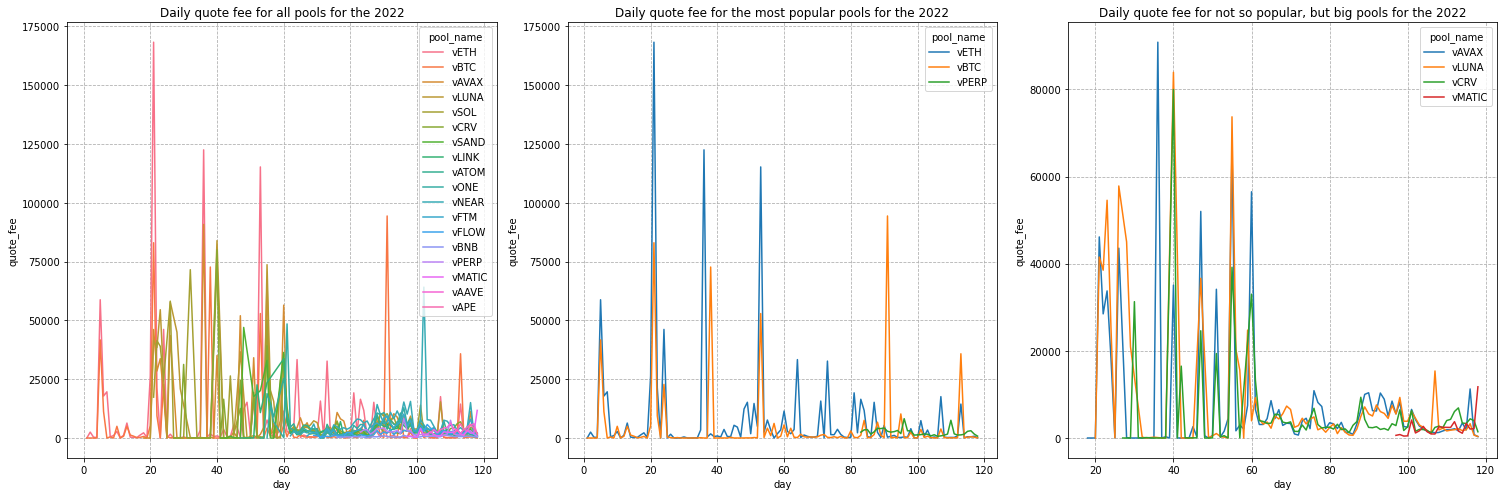

In [50]:
fig = plt.figure(figsize=(21, 7))
ax = fig.add_subplot(1, 3, 1)
sns.lineplot(data=daily_liquidity_changes_df[daily_liquidity_changes_df.index < 200], 
             x="day", y="quote_fee", hue="pool_name")
ax.grid(True, linestyle='--')
ax.set_title("Daily quote fee for all pools for the 2022")

ax = fig.add_subplot(1, 3, 2)
sns.lineplot(data=daily_liquidity_changes_df[(daily_liquidity_changes_df.index < 200) &
                                             (daily_liquidity_changes_df["pool_name"].isin(["vETH", "vBTC", "vPERP"]))], 
             x="day", y="quote_fee", hue="pool_name")
ax.grid(True, linestyle='--')
ax.set_title("Daily quote fee for the most popular pools for the 2022")

ax = fig.add_subplot(1, 3, 3)
sns.lineplot(data=daily_liquidity_changes_df[(daily_liquidity_changes_df.index < 200) &
                                             (daily_liquidity_changes_df["pool_name"].isin(["vMATIC", "vCRV", "vAVAX", "vLUNA"]))], 
             x="day", y="quote_fee", hue="pool_name")
ax.grid(True, linestyle='--')
ax.set_title("Daily quote fee for not so popular, but big pools for the 2022")

fig.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

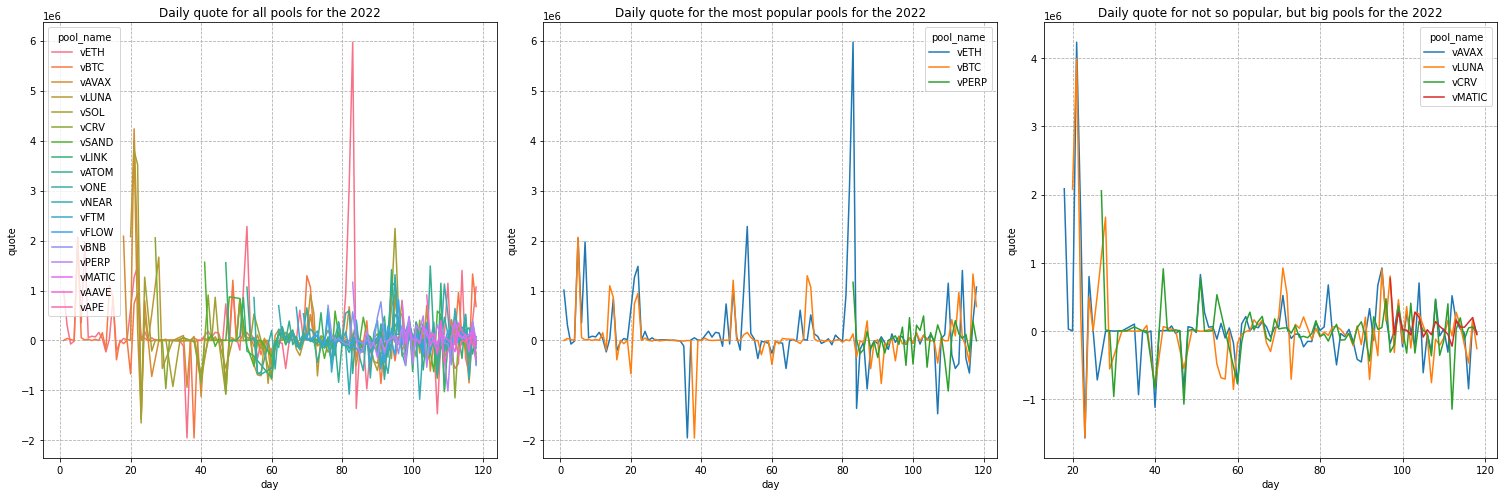

In [51]:
fig = plt.figure(figsize=(21, 7))
ax = fig.add_subplot(1, 3, 1)
sns.lineplot(data=daily_liquidity_changes_df[daily_liquidity_changes_df.index < 200], 
             x="day", y="quote", hue="pool_name")
ax.grid(True, linestyle='--')
ax.set_title("Daily quote for all pools for the 2022")

ax = fig.add_subplot(1, 3, 2)
sns.lineplot(data=daily_liquidity_changes_df[(daily_liquidity_changes_df.index < 200) &
                                             (daily_liquidity_changes_df["pool_name"].isin(["vETH", "vBTC", "vPERP"]))], 
             x="day", y="quote", hue="pool_name")
ax.grid(True, linestyle='--')
ax.set_title("Daily quote for the most popular pools for the 2022")

ax = fig.add_subplot(1, 3, 3)
sns.lineplot(data=daily_liquidity_changes_df[(daily_liquidity_changes_df.index < 200) &
                                             (daily_liquidity_changes_df["pool_name"].isin(["vMATIC", "vCRV", "vAVAX", "vLUNA"]))], 
             x="day", y="quote", hue="pool_name")
ax.grid(True, linestyle='--')
ax.set_title("Daily quote for not so popular, but big pools for the 2022")

fig.tight_layout()
plt.show

In [52]:
len(liquidity_changes_df["maker"].unique())

810

## Count makers and liquidity changes

Another important aspect would be to check amount of applied liquidity changes depending on the pool and to see how many makers were performing their activity on the pools

In [53]:
makers_count_by_trader_df = liquidity_changes_df[["maker", "pool_name"]].groupby("pool_name").count()
makers_count_by_trader_df.rename(columns={"maker": "changes_count"}, inplace=True)
makers_count_by_trader_df["makers_count"] = np.zeros(len(makers_count_by_trader_df))

for pool in liquidity_changes_df["pool_name"].unique():
    makers_count_by_trader_df.loc[pool, "makers_count"] = int(len(liquidity_changes_df[liquidity_changes_df["pool_name"] == pool
                                                                   ]["maker"].unique()))
makers_count_by_trader_df

,changes_count,makers_count
pool_name,,
vAAVE,1008,26.0
vAPE,618,49.0
vATOM,10740,70.0
vAVAX,4923,106.0
vBNB,3389,22.0
vBTC,4554,150.0
vCRV,4314,76.0
vETH,7099,594.0
vFLOW,3949,43.0


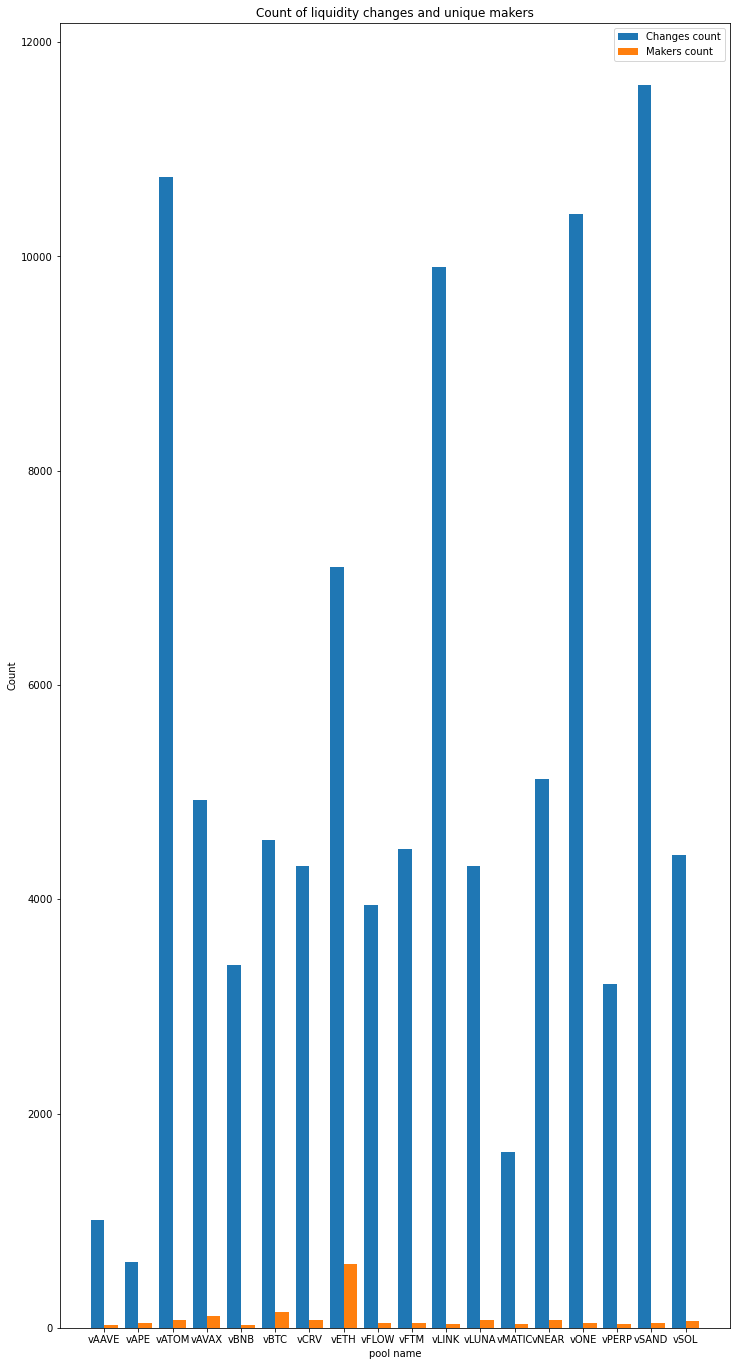

In [54]:
X_axis = np.arange(len(makers_count_by_trader_df.index))
plt.figure(figsize=(12, 24))

plt.bar(X_axis - 0.2, makers_count_by_trader_df["changes_count"], 0.4, label = 'Changes count')
plt.bar(X_axis + 0.2, makers_count_by_trader_df["makers_count"], 0.4, label = 'Makers count')
  
plt.xticks(X_axis, makers_count_by_trader_df.index)
plt.xlabel("pool name")
plt.ylabel("Count")
plt.title("Count of liquidity changes and unique makers")
plt.legend()
plt.show()

## Ticks analysis

Each liquidity change contained specification of the "tick" which is responsible for specification of the price range where maker is providing its liquidity. Further this "tick" aspect is demonstrated with more details

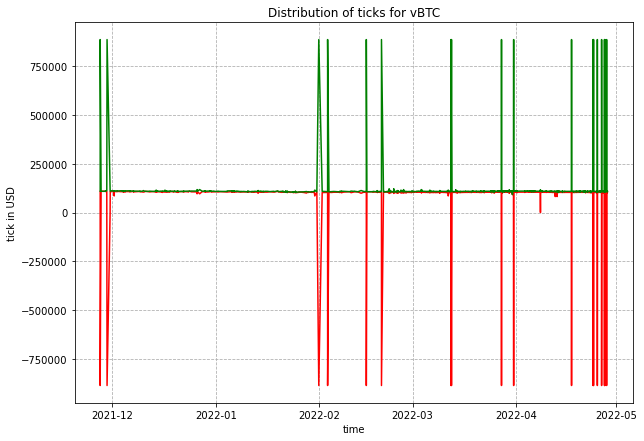

In [55]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(liquidity_changes_df[liquidity_changes_df["pool_name"] == "vBTC"]["time"],
        liquidity_changes_df[liquidity_changes_df["pool_name"] == "vBTC"]["lower_tick"],
        color='r', label='lower tick')
ax.plot(liquidity_changes_df[liquidity_changes_df["pool_name"] == "vBTC"]["time"],
        liquidity_changes_df[liquidity_changes_df["pool_name"] == "vBTC"]["upper_tick"],
        color='g', label='upper tick')
ax.set_xlabel("time")
ax.set_ylabel("tick in USD")
ax.set_title("Distribution of ticks for vBTC")
ax.grid(True, linestyle='--')
plt.show()

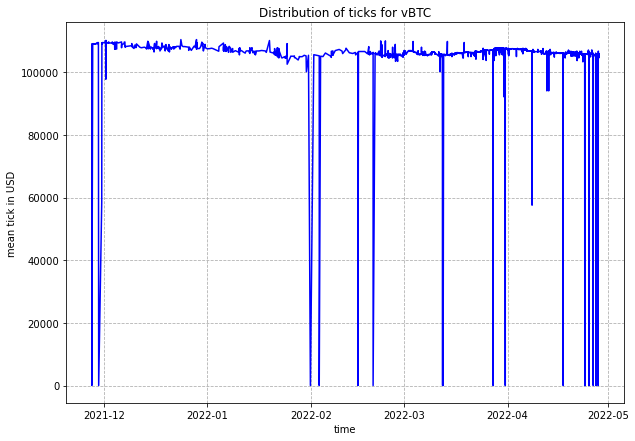

In [56]:
liquidity_changes_df["mean_tick"] = ((liquidity_changes_df["upper_tick"] + liquidity_changes_df["lower_tick"]) /
                                                                        2)

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(liquidity_changes_df[liquidity_changes_df["pool_name"] == "vBTC"]["time"],
        liquidity_changes_df[liquidity_changes_df["pool_name"] == "vBTC"]["mean_tick"],
        color='b', label='mean tick')
ax.set_xlabel("time")
ax.set_ylabel("mean tick in USD")
ax.set_title("Distribution of ticks for vBTC")
ax.grid(True, linestyle='--')
plt.show()

# Makers

*   ```id``` - address of the maker;
*   ```collected_fee``` - total collected maker fee across all orders
*   ```block_number``` and ```timestamp``` - last updated block number and last updated Unix timestamp 

In [57]:
makers_df = pd.read_csv("makers.csv")
makers_df.drop(columns=["Unnamed: 0"], inplace=True)
makers_df["time"] = pd.to_datetime(makers_df["timestamp"], unit='s')
makers_df

,id,collected_fee,block_number,timestamp,time
0,0x35952141922ee99a04e016c967c3f0ad589ea958,0.817147,524763,1638026591,2021-11-27 15:23:11
1,0x98029c23e4a554989c280de7fcb1c2ededf2b17f,13.692338,551217,1638093111,2021-11-28 09:51:51
2,0x27fee0c6356c2f27e646d73f2256d30331c6a001,0.605999,578869,1638166558,2021-11-29 06:15:58
3,0xb3344d84ad8dd6b96301991bf12dc739e226c9cf,0.092905,579610,1638169448,2021-11-29 07:04:08
4,0x837b25ad9d49eb70d9a302a7e5c4e5035cae8a79,0.312103,580156,1638171793,2021-11-29 07:43:13
...,...,...,...,...,...
1289,0xd91fbe00dff943ecfe0382b216df7de859853c20,0.015867,9045938,1653571202,2022-05-26 13:20:02
1290,0xe4d999cd3111d8e1cabc5c56a8bc0fa57b0f24ae,39546.758633,9045952,1653571202,2022-05-26 13:20:02
1291,0x2b0685c5d0d7c93a4f944ddb16a8c339393008cd,0.034936,9046164,1653571307,2022-05-26 13:21:47
1292,0x3c2be159678c6bc641a2852e2e6d95759a024241,45905.312362,9046156,1653571307,2022-05-26 13:21:47


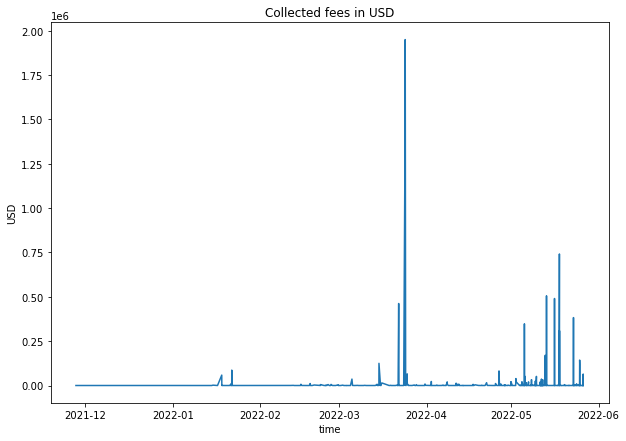

In [58]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(makers_df["time"], makers_df["collected_fee"])
ax.set_xlabel("time")
ax.set_ylabel("USD")
ax.set_title("Collected fees in USD")
plt.show()

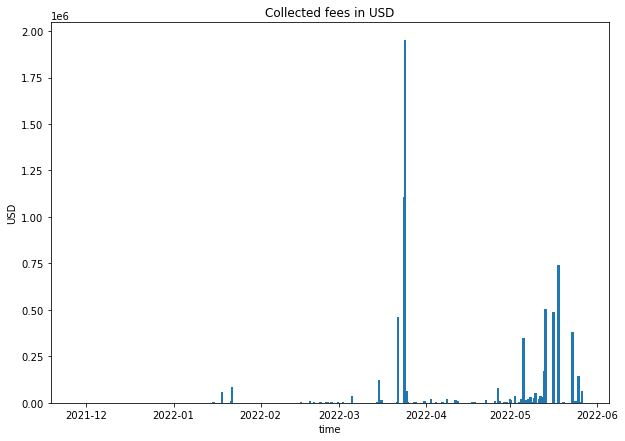

In [59]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(makers_df["time"], makers_df["collected_fee"])
ax.set_xlabel("time")
ax.set_ylabel("USD")
ax.set_title("Collected fees in USD")
plt.show()

# Open orders

*   ```id``` - id of the open order in format (**maker adress**)-(**base token**)-(**address**)-(**lower tick**);
*   ```base_token``` - hash address of the respective token, it will be removed because it will be replaced by simple name of the token;
*   ```upper_tick``` and ```lower_tick``` - ticks that are used to specify range of price where liquidity provider will be providing both tokens for trading and therefore trader will receive fee within this for trades within this price range;
*   ```liquidity``` - amount of liquidity provided;
*   ```collected_fee``` - amount of collected fee per specified order

In [60]:
open_orders_df = pd.read_csv("open_orders.csv")
open_orders_df["time"] = pd.to_datetime(open_orders_df["timestamp"], unit='s')
open_orders_df["pool_name"] = open_orders_df["base_token"].replace(tokens_addresses_to_names_dict)
open_orders_df.drop(columns=["Unnamed: 0", "base_token"], inplace=True)
open_orders_df

,id,lower_tick,upper_tick,liquidity,collected_fee,collected_fee_in_lifecycle,block_number,timestamp,time,pool_name
0,0xb3344d84ad8dd6b96301991bf12dc739e226c9cf-0x8...,82560,83280,0,0.092905,0.0,519810,1638012541,2021-11-27 11:29:01,vETH
1,0x35952141922ee99a04e016c967c3f0ad589ea958-0x8...,82920,83640,0,0.817147,0.0,524763,1638026591,2021-11-27 15:23:11,vETH
2,0x98029c23e4a554989c280de7fcb1c2ededf2b17f-0x8...,109020,109200,0,9.275207,0.0,539423,1638065839,2021-11-28 02:17:19,vBTC
3,0x98029c23e4a554989c280de7fcb1c2ededf2b17f-0x8...,108780,109080,0,0.272230,0.0,547656,1638084887,2021-11-28 07:34:47,vBTC
4,0x98029c23e4a554989c280de7fcb1c2ededf2b17f-0x8...,108840,109080,0,0.322718,0.0,551150,1638093044,2021-11-28 09:50:44,vBTC
...,...,...,...,...,...,...,...,...,...,...
14601,0x3c2be159678c6bc641a2852e2e6d95759a024241-0x3...,-7920,14040,1014000531006066466095914,545.656108,0.0,9055973,1653578963,2022-05-26 15:29:23,vSAND
14602,0xe4d999cd3111d8e1cabc5c56a8bc0fa57b0f24ae-0x3...,5760,27720,512139583146431454950415,80.704259,0.0,9056064,1653579027,2022-05-26 15:30:27,vNEAR
14603,0xe4d999cd3111d8e1cabc5c56a8bc0fa57b0f24ae-0x3...,5880,27840,0,35.541399,0.0,9056074,1653579027,2022-05-26 15:30:27,vNEAR
14604,0x3c2be159678c6bc641a2852e2e6d95759a024241-0x5...,11820,33780,377987196027223073127996,38.161808,0.0,9056084,1653579042,2022-05-26 15:30:42,vATOM


Perpetual V2 is based on the tick mechanism of the Uniswap V3, which gives an option for a trader to define range of values in which trades will be performed. Therefore, considering ticks mechanism it is required to restore price values of the tokens with respective values of the ticks. Upper and lower bound prices will be found conform formula:

**p(i) = 1.0001 ^ i**

In [61]:
open_orders_df["lower_bound"] = pow(1.0001, open_orders_df["lower_tick"])
open_orders_df["upper_bound"] = pow(1.0001, open_orders_df["upper_tick"])

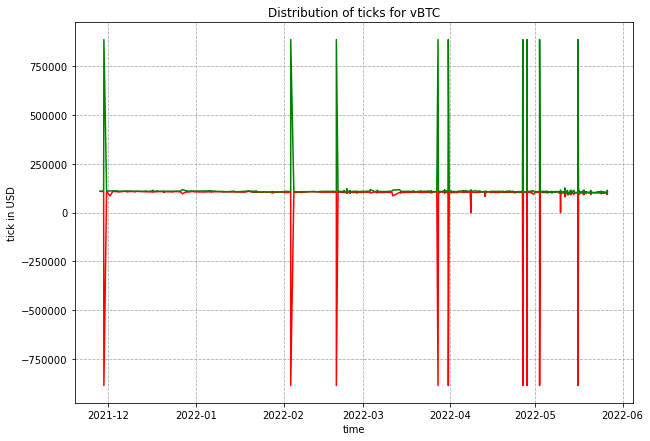

In [62]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(open_orders_df[open_orders_df["pool_name"] == "vBTC"]["time"],
        open_orders_df[open_orders_df["pool_name"] == "vBTC"]["lower_tick"],
        color='r', label='lower tick')
ax.plot(open_orders_df[open_orders_df["pool_name"] == "vBTC"]["time"],
        open_orders_df[open_orders_df["pool_name"] == "vBTC"]["upper_tick"],
        color='g', label='upper tick')
ax.set_xlabel("time")
ax.set_ylabel("tick in USD")
ax.set_title("Distribution of ticks for vBTC")
ax.grid(True, linestyle='--')
plt.show()

# TICKS

## Analysis of the "central" price and overall ticks with removal of the outliers

The interesting moment is that ticks are distributed with extreme outliers and therefore it would be great to see ticks with removal of those extreme outliers. Another aspect is that makers providing liquidity are setting upper and lower tick, which conform mechanism of the Uniswap V3 defines how there will be performed swap of tokens and how they will be regulated on the platform.

For outliers removal will be used strategy of the median with added standard deviation. In case if value is smaller than this threshold - it passes. Otherwise it will be ignored. This value will be used because of the outliers, which are extreme values.

Therefore, it will be good to also see "central" price - such a price that is located between lower and upper tick, when maker will fully provide both of the tokens to perform exchange. But considering the fact that extreme ticks are able to cause prices go to the unrealistically big values (it means that there are traders willing to catch all possible trades at any price range) it is required to apply the same filtering as in case of ticks

There is one more interesting moment to check. There will be for each pool estimated lower and upper bounds estimated by makers in pair with central price, meaning that there is a need to check for swapped prices distributions in the position changes to see how it correlates with the makers estimations

In [63]:
position_changes_df = pd.read_csv("position_changes.csv")
position_changes_df.drop(columns=["Unnamed: 0"], inplace=True)
position_changes_df["time"] = pd.to_datetime(position_changes_df["timestamp"], unit='s')
position_changes_df["pool_name"] = position_changes_df["base_token"].replace(tokens_addresses_to_names_dict)

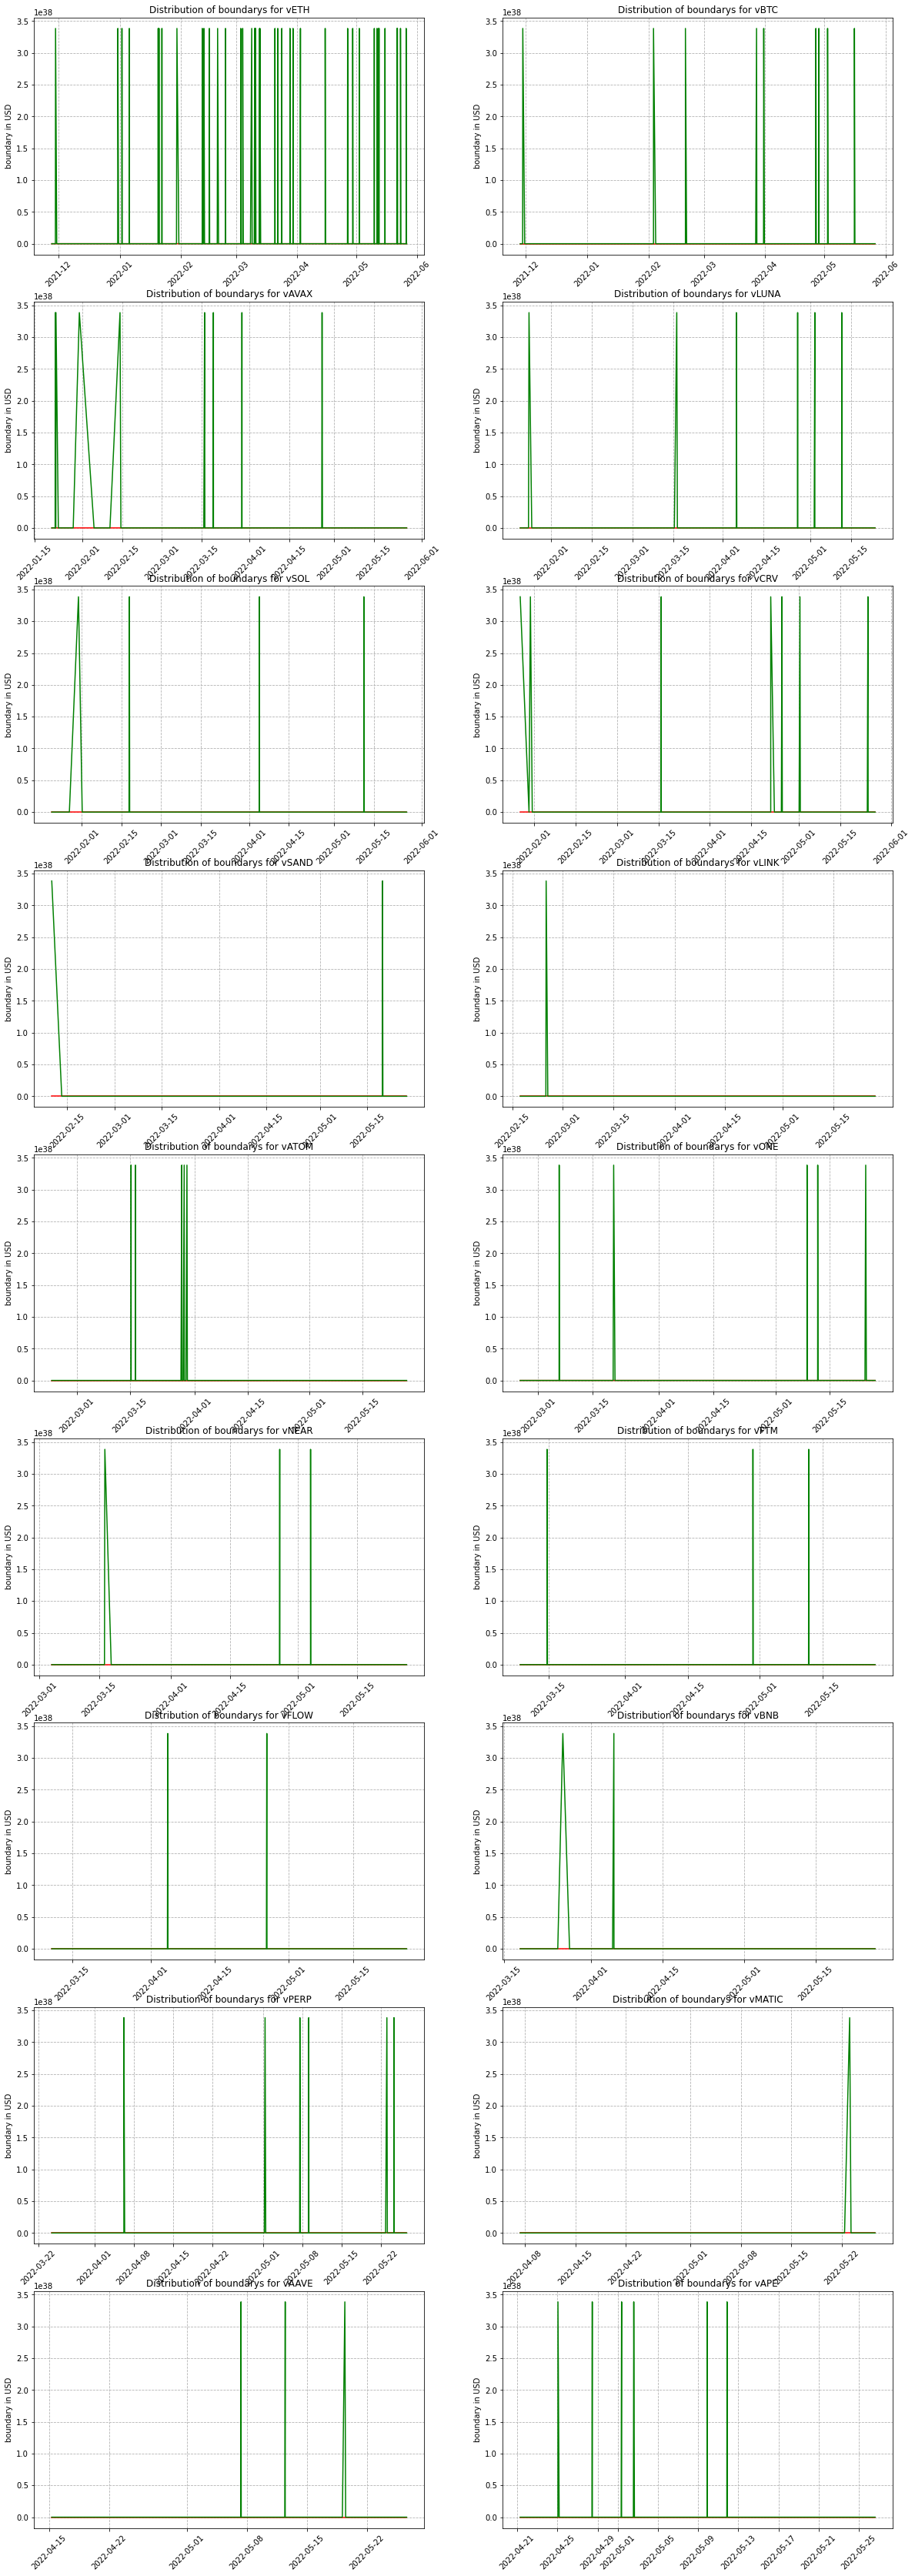

In [64]:
fig = plt.figure(figsize=(20, 60))
chart_index = 1

for pool in open_orders_df["pool_name"].unique():
    ax = fig.add_subplot(9, 2, chart_index)
    pool_open_orders_df = open_orders_df[open_orders_df["pool_name"] == pool]
    pool_position_changes_df = position_changes_df[position_changes_df["pool_name"] == pool]
    
    #   show boundaries of the open orders
    ax.plot(pool_open_orders_df["time"], pool_open_orders_df["lower_bound"],
            color='r', label='lower boundary')
    ax.plot(pool_open_orders_df["time"], pool_open_orders_df["upper_bound"],
            color='g', label='upper boundary')
    ax.set_ylabel("boundary in USD")
    ax.set_title("Distribution of boundarys for " + pool)
    ax.grid(True, linestyle='--')
    plt.xticks(rotation=45)
    chart_index += 1

Pure values contain some outliers that cause distributions too look unrealistic and uninterpretable, meaning that there is a need for an outlier removal. Considering that there was applied a formula of demonstrating only values in range *median - 2 * standard deviations < value < median + 2 * standard deviations* catching 95% of the overall distribution with ignoring mostly outliers.

From the left can be seen progression of the upper and lower bounds for liquidity provision prices and swap price (it shows how maker try to catch with the swap prices)

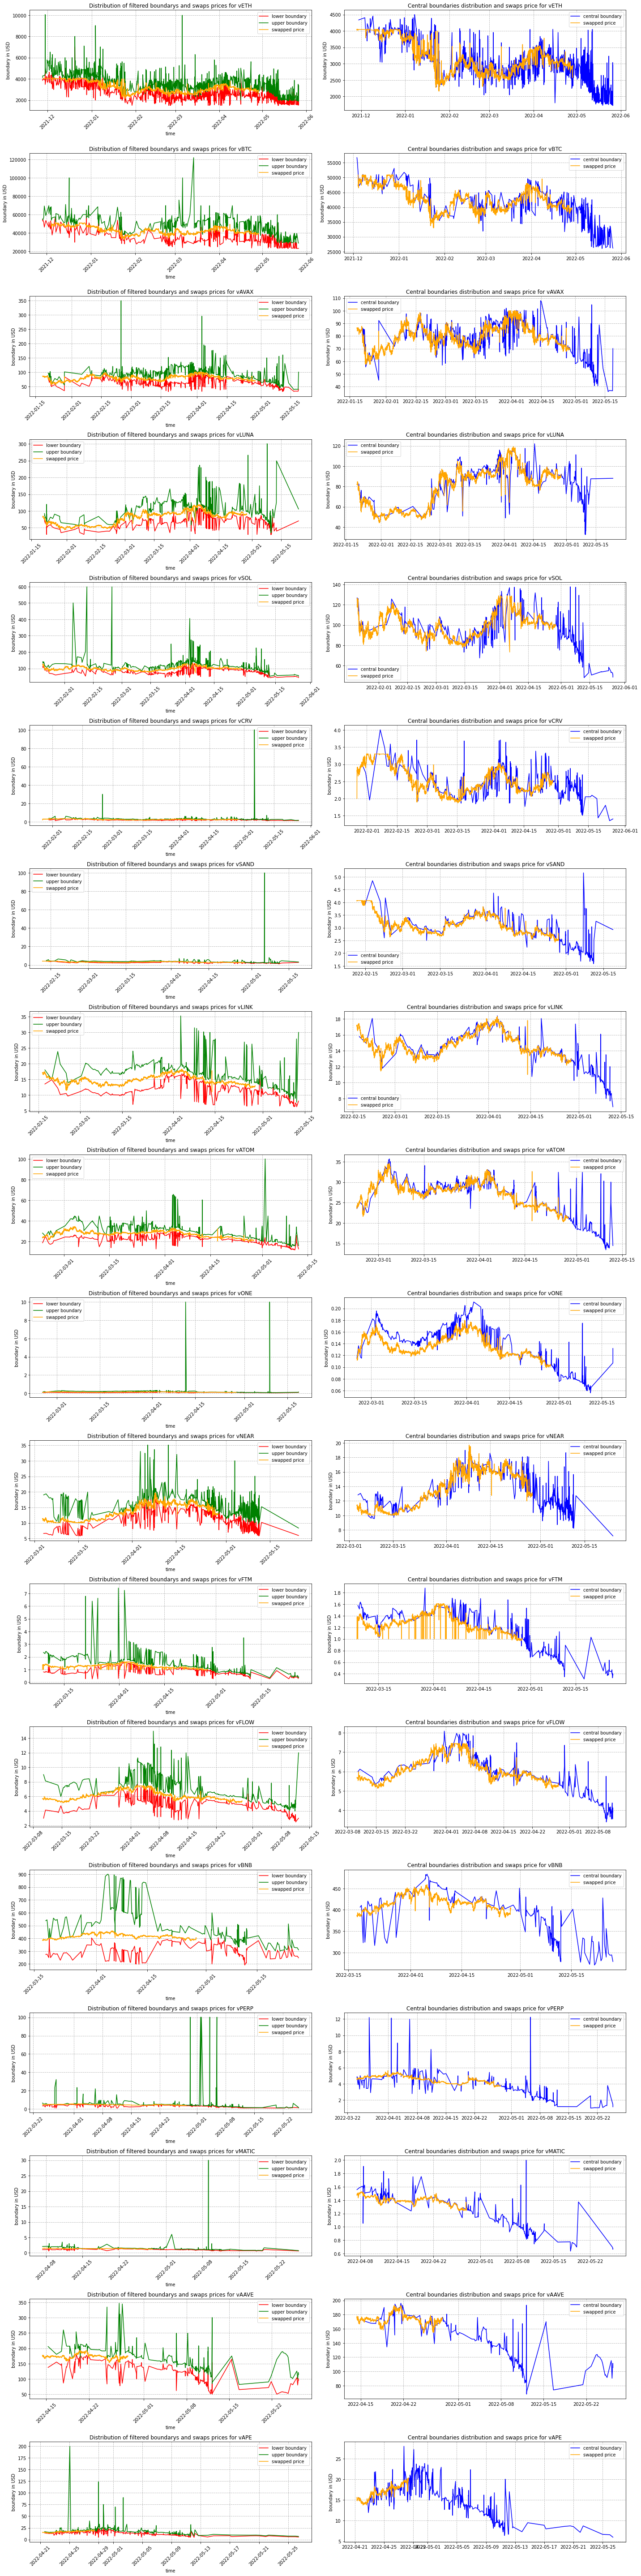

In [65]:
fig = plt.figure(figsize=(20, 80))
chart_index = 1

for pool in open_orders_df["pool_name"].unique():
    pool_open_orders_df = open_orders_df[open_orders_df["pool_name"] == pool]
    pool_position_changes_df = position_changes_df[position_changes_df["pool_name"] == pool]
    
    #   show filtered boundaries of the open orders
    ax = fig.add_subplot(18, 2, chart_index)
    pool_data_filtered = pool_open_orders_df[
        (pool_open_orders_df["lower_bound"] > (pool_open_orders_df["lower_bound"].median() - pool_open_orders_df["lower_bound"].std())) &
        (pool_open_orders_df["upper_bound"] < (pool_open_orders_df["upper_bound"].median() + pool_open_orders_df["upper_bound"].std()))
    ]
    ax.plot(pool_data_filtered["time"], pool_data_filtered["lower_bound"], color='r', label='lower boundary')
    ax.plot(pool_data_filtered["time"], pool_data_filtered["upper_bound"], color='g', label='upper boundary')
    ax.plot(pool_position_changes_df[(pool_position_changes_df["swapped_price"] > (pool_position_changes_df["swapped_price"].median() -
                                                                                   2 * pool_position_changes_df["swapped_price"].std())) &
                                     (pool_position_changes_df["swapped_price"] < (pool_position_changes_df["swapped_price"].median() +
                                                                                   2 * pool_position_changes_df["swapped_price"].std()))
                                     ]["time"], 
            pool_position_changes_df[(pool_position_changes_df["swapped_price"] > (pool_position_changes_df["swapped_price"].median() -
                                                                                   2 * pool_position_changes_df["swapped_price"].std())) &
                                     (pool_position_changes_df["swapped_price"] < (pool_position_changes_df["swapped_price"].median() +
                                                                                   2 * pool_position_changes_df["swapped_price"].std()))
                                     ]["swapped_price"], 
            color='orange', label='swapped price')
    ax.set_xlabel("time")
    ax.set_ylabel("boundary in USD")
    ax.set_title("Distribution of filtered boundarys and swaps prices for " + pool)
    ax.legend()
    ax.grid(True, linestyle='--')
    plt.xticks(rotation=45)
    chart_index += 1
    
    #   show central boundaries for the open orders and respective swaps price distribution
    ax = fig.add_subplot(18, 2, chart_index)
    pool_position_changes_df = position_changes_df[position_changes_df["pool_name"] == pool]
    bounds_filtered = pool_data_filtered[(pool_data_filtered["lower_bound"] < (pool_data_filtered["lower_bound"].median() + 
                                                                    2 * pool_data_filtered["lower_bound"].std())) &
                                         (pool_data_filtered["upper_bound"] < (pool_data_filtered["upper_bound"].median() + 
                                                                    2 * pool_data_filtered["upper_bound"].std()))]
    ax.plot(bounds_filtered["time"], (bounds_filtered["lower_bound"] + bounds_filtered["upper_bound"]) / 2,
            color='b', label='central boundary')
    ax.plot(pool_position_changes_df[(pool_position_changes_df["swapped_price"] > (pool_position_changes_df["swapped_price"].median() -
                                                                                   2 * pool_position_changes_df["swapped_price"].std())) &
                                     (pool_position_changes_df["swapped_price"] < (pool_position_changes_df["swapped_price"].median() +
                                                                                   2 * pool_position_changes_df["swapped_price"].std()))
                                     ]["time"], 
            pool_position_changes_df[(pool_position_changes_df["swapped_price"] > (pool_position_changes_df["swapped_price"].median() -
                                                                                   2 * pool_position_changes_df["swapped_price"].std())) &
                                     (pool_position_changes_df["swapped_price"] < (pool_position_changes_df["swapped_price"].median() +
                                                                                   2 * pool_position_changes_df["swapped_price"].std()))
                                     ]["swapped_price"], 
            color='orange', label='swapped price')
    ax.set_ylabel("boundary in USD")
    ax.set_title("Central boundaries distribution and swaps price for " + pool)
    ax.grid(True, linestyle='--')
    ax.legend()
    chart_index += 1
    
fig.tight_layout()
plt.show()

In [66]:
top_makers = makers_df.sort_values(by="collected_fee").tail(10)["id"]

In [67]:
position_changes_df[position_changes_df["trader"].isin(top_makers)]

,id,tx_hash,trader,base_token,exchanged_position_size,exchanged_position_notional,fee,open_notional,realized_pnl,position_size_after,swapped_price,entry_price_after,market_price_after,from_function_signature,block_number_log_index,block_number,timestamp,time,pool_name
0,0x0bc364e9f5a99c87cfb5c1f4a6ef2b9784e872092805...,0x0bc364e9f5a99c87cfb5c1f4a6ef2b9784e872092805...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.055019,-2997.000000,3.000000,-15000.000000,0.000000,0.275492,54472.154115,54448.103193,54491.778871,0xb6b1b6c3,515608004,515608,1638001140,2021-11-27 08:19:00,vBTC
1,0x0ccfa4751250a5374b5d28823a1011987b833f71a1ce...,0x0ccfa4751250a5374b5d28823a1011987b833f71a1ce...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.055098,-2997.000000,3.000000,-9000.000000,0.000000,0.165414,54393.697496,54408.885139,54413.308117,0xb6b1b6c3,515587004,515587,1638001140,2021-11-27 08:19:00,vBTC
2,0x0e085ae4b7c345ee6de6d67f16c8c127a694d1c9f27f...,0x0e085ae4b7c345ee6de6d67f16c8c127a694d1c9f27f...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0.729828,-2997.000000,3.000000,-3000.000000,0.000000,0.729828,4106.445744,4110.556300,4108.035203,0xb6b1b6c3,515571005,515571,1638001140,2021-11-27 08:19:00,vETH
3,0x47357bec5ee7101b57f457be5135c91a9c7133cc82bb...,0x47357bec5ee7101b57f457be5135c91a9c7133cc82bb...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0.728137,-2997.000000,3.000000,-12000.000000,0.000000,2.915928,4115.986193,4115.327606,4117.577498,0xb6b1b6c3,515594004,515594,1638001140,2021-11-27 08:19:00,vETH
4,0x548dd8a96b9faa92066283339832e380fd506f4ebc94...,0x548dd8a96b9faa92066283339832e380fd506f4ebc94...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0.729264,-2997.000000,3.000000,-6000.000000,0.000000,1.459092,4109.624663,4112.146735,4111.214738,0xb6b1b6c3,515584004,515584,1638001140,2021-11-27 08:19:00,vETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834846,0xf60c233896e3be49041e0afd63c9afaf1209f4139c75...,0xf60c233896e3be49041e0afd63c9afaf1209f4139c75...,0x675e328b73e15cd41acd2828b83b417687c36bba,0x7161c3416e08abaa5cd38e68d9a28e43a694e037,2249.731164,-5694.300000,5.700000,32318.788169,-62.892331,-12898.207594,2.531102,2.505681,2.532122,0xb6b1b6c3,6651539008,6651539,1651138070,2022-04-28 09:27:50,vCRV
1834847,0xf70dcda6dc2a69f01dfbc1a3f5fc31a8b12f283a97cc...,0xf70dcda6dc2a69f01dfbc1a3f5fc31a8b12f283a97cc...,0xe77dd81813bd06d74a30d1b2c07418906456498e,0x333b1ea429a88d0dd48ce7c06c16609cd76f43a8,-586.197998,1501.501502,1.501502,101464.880674,0.000000,-40149.175003,2.561424,2.527197,2.560461,0xb6b1b6c3,6651541007,6651541,1651138070,2022-04-28 09:27:50,vSAND
1834848,0x07e77e03fa9add15c6a1fe3aef21c67f6ce90f6ea0a0...,0x07e77e03fa9add15c6a1fe3aef21c67f6ce90f6ea0a0...,0x70332de459d5554a9a310a7c4f7c6069c73604f9,0x77d0cc9568605bfff32f918c8ffaa53f72901416,-8638.574304,900.900901,0.900901,22407.754542,0.000000,-216419.460865,0.104288,0.103539,0.104270,0xb6b1b6c3,6651558007,6651558,1651138085,2022-04-28 09:28:05,vONE
1834861,0x978645e43b1779dae628ed4df8a0350803d161c8fef1...,0x978645e43b1779dae628ed4df8a0350803d161c8fef1...,0xd8bcd1e2f0e96a3402fd678b0b2eaceb80e1c226,0xbe5de48197fc974600929196239e264ecb703ee8,3371.136364,-4297.643387,0.000000,85634.249350,-31.434297,-67667.741060,1.274835,1.265511,1.273833,0xcde109b6,6651595007,6651595,1651138149,2022-04-28 09:29:09,vMATIC


In [68]:
grouped_position_changes_df = position_changes_df[["trader", "realized_pnl"]].groupby("trader").sum()
grouped_position_changes_df.sort_values(by='realized_pnl', inplace=True)
top_traders = grouped_position_changes_df.tail(100).index

In [69]:
for top_trader in top_traders:
    if top_trader in top_makers:
        print(top_trader)

In [70]:
for top_trader in top_traders:
    if top_trader in makers_df["id"].unique():
        print(top_trader)

0xb88e3c784257f62284c0c1d2c49af4e3ad2b02ad
0xfef077a226742d824eec997b1411c5aaf0ec6514
0x3f11753c51a8acc79b78b729d477948b4b880da1
0x3620b7be036c3be6532e0d871cd57f4215ae17e0
0xed18d1e55c4bba34abdf950119964ae3a9a10e04
0x9c95aa508ddc6c2fc22984fd0211da8be5d7939e
0x99c25959b1042edf940e9bece9daa751879ea6dc
0xc0a13a3850b7a01e068e18edb1918d091cb10e4a
0x6dc212f39c0325f32d3c3a864f8cc30bfa5d4cf7
0x75f8405daa5a2b171cada25f8e60c4e8dff1bb35
0x1d16ea2b8bfcf5f7c13c1ea792d6c6a7a9aa1063
0x63618d66c7a6a487491e2d0793f7b5b1c86485c0
0xebd29307345ee6aec943129d9bb44120554efaac


In [71]:
grouped_makers_stats = position_changes_df[position_changes_df["trader"].isin(top_makers)][["trader", "fee", "realized_pnl"]].groupby("trader").sum()
grouped_makers_investments_stats = makers_df[["id", "collected_fee"]].groupby("id").sum().sort_values("collected_fee").tail(10)

In [72]:
grouped_makers_stats["collected_fee"] = grouped_makers_investments_stats["collected_fee"]
grouped_makers_stats["real_result"] = grouped_makers_stats["realized_pnl"] + grouped_makers_investments_stats["collected_fee"]
grouped_makers_stats

,fee,realized_pnl,collected_fee,real_result
trader,,,,
0x3478d1ba5bc6c0e662dec109c70c0065dad5f5be,6.863494e+04,-2.085017e+05,3.085313e+05,1.000295e+05
0x4cd804c696f54c419b75fc241a17c512bfb13df4,1.534644e+05,-6.213989e+05,4.621320e+05,-1.592669e+05
0x675e328b73e15cd41acd2828b83b417687c36bba,4.213297e+04,-1.060156e+05,1.704090e+05,6.439342e+04
0x70332de459d5554a9a310a7c4f7c6069c73604f9,1.535136e+05,-6.542422e+05,7.413193e+05,8.707711e+04
0x94934851b2c6a066f9e5acb353bce4bc7fcdcdbd,8.430406e+04,-1.672157e+05,5.053723e+05,3.381566e+05
0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,1.153764e+06,-3.387945e+06,1.949788e+06,-1.438157e+06
0xafa64cca337efee0ad827f6c2684e69275226e90,2.313923e+01,-3.237929e+02,3.475484e+05,3.472246e+05
0xd8bcd1e2f0e96a3402fd678b0b2eaceb80e1c226,2.800239e+04,-1.874083e+05,3.828121e+05,1.954037e+05
0xe77dd81813bd06d74a30d1b2c07418906456498e,8.787192e+04,-4.359019e+05,4.903811e+05,5.447923e+04



Conform the results can be seen that there are small profits extracted by the makers mostly. While trading results are bad from the losses perspective, makers got some profits from the collected fees, meaning that for them investments were more profitable.